In [1]:
from collections import defaultdict, Counter
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
data = \
[[['Вера Сергеевна', 'Соницкий'],
  ['Вера Сергеевна', 'Соницкий', 'Губарев'],
  ['Соницкий', 'Губарев'],
  ['Софья Павловна', 'Соницкий', 'Губарев'],
  ['Софья Павловна', 'Губарев'],
  ['Соницкий', 'Вера Сергеевна', 'Софья Павловна', 'Губарев', 'Леонтьев', 'Наташа'],
  ['Наташа', 'Соницкий', 'Вера Сергеевна'],
  ['Соницкий', 'Вера Сергеевна']],
 [['Наташа', 'Люба'],
  ['Наташа', 'Люба', 'Софья Павловна'],
  ['Наташа', 'Вера Сергеевна'],
  ['Наташа', 'Вера Сергеевна', 'Соницкий'],
  ['Леонтьев', 'Софья Павловна'],
  ['Леонтьев', 'Софья Павловна', 'Соницкий'],
  ['Леонтьев', 'Софья Павловна', 'Соницкий', 'Наташа'],
  ['Леонтьев', 'Софья Павловна'],
  ['Леонтьев', 'Софья Павловна', 'Вера Сергеевна', 'Соницкий', 'Наташа', 'Губарев', 'Гости'],
  ['Губарев'],
  ['Леонтьев', 'Наташа'],
  ['Наташа'],
  ['Наташа', 'Софья Павловна', 'Варвара'],
  ['Наташа', 'Софья Павловна'],
  ['Наташа', 'Софья Павловна', 'Люба'],
  ['Наташа', 'Софья Павловна', 'Люба', 'Леонтьев']],
 [['Леонтьев', 'Софья Павловна', 'Наташа', 'Люба'],
  ['Леонтьев', 'Софья Павловна', 'Люба'],
  ['Леонтьев', 'Софья Павловна'],
  ['Леонтьев', 'Софья Павловна', 'Наташа'],
  ['Софья Павловна'],
  ['Софья Павловна', 'Леонтьев'],
  ['Софья Павловна', 'Варвара'],
  ['Наташа', 'Люба'],
  ['Наташа', 'Люба', 'Софья Павловна', 'Леонтьев']],
 [['Наташа'],
  ['Наташа', 'Люба'],
  ['Наташа', 'Люба', 'Варвара'],
  ['Наташа', 'Леонтьев'],
  ['Леонтьев'],
  ['Леонтьев', 'Софья Павловна'],
  ['Леонтьев', 'Софья Павловна', 'Соницкий', 'Вера Сергеевна'],
  ['Софья Павловна', 'Наташа']],
 [['Леонтьев', 'Софья Павловна'],
  ['Леонтьев', 'Наташа'],
  ['Леонтьев', 'Софья Павловна', 'Соницкий', 'Вера Сергеевна'],
  ['Леонтьев', 'Софья Павловна'],
  ['Леонтьев'],
  ['Леонтьев', 'Наташа'],
  ['Софья Павловна'],
  ['Софья Павловна', 'Люба'],
  ['Леонтьев', 'Люба'],
  ['Леонтьев'],
  ['Леонтьев', 'Софья Павловна']]]


## Матрица

In [3]:
drama_heroes = [hero for act in data for scene in act for hero in scene]
drama_heroes = list(sorted(set(drama_heroes)))
matrices = [np.array([[1 if hero in scene else 0 for scene in act] for hero in drama_heroes]) for act in data]

In [4]:
def rome(dec):
    return {1: 'I', 2: 'II', 3: 'III', 4: 'IV', 5: 'V', 6: 'VI'}[dec]

def col(act, scene):
    return rome(act) + '.' + str(scene)

def cols():
    return [col(n_act+1, n_scene+1) for n_act, act in enumerate(matrices) for n_scene in range(len(act[0]))]

matrix = np.hstack(matrices)
pd.DataFrame(matrix, index=drama_heroes, columns=cols())

,I.1,I.2,I.3,I.4,I.5,I.6,I.7,I.8,II.1,II.2,II.3,II.4,II.5,II.6,II.7,II.8,II.9,II.10,II.11,II.12,II.13,II.14,II.15,II.16,III.1,III.2,III.3,III.4,III.5,III.6,III.7,III.8,III.9,IV.1,IV.2,IV.3,IV.4,IV.5,IV.6,IV.7,IV.8,V.1,V.2,V.3,V.4,V.5,V.6,V.7,V.8,V.9,V.10,V.11
Варвара,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Вера Сергеевна,1,1,0,0,0,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
Гости,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Губарев,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Леонтьев,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,1,1,1,1,1,0,1,0,0,1,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1
Люба,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
Наташа,0,0,0,0,0,1,1,0,1,1,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,0,0,1,0,0,0,1,1,1,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
Соницкий,1,1,1,1,0,1,1,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
Софья Павловна,0,0,0,1,1,1,0,0,0,1,0,0,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,1


## Мобильность

In [5]:
def mob(mat):
    return (np.sum(np.abs(mat[:, 1:] - mat[:, :-1]), axis=1) - 1) / (len(mat[0])-1)

index = list(range(1, len(matrices) + 1)) + ['пьеса']
mobility = list(map(mob, matrices + [matrix]))
mobility = pd.DataFrame(mobility, index=index, columns=drama_heroes).round(2).transpose()
mobility[mobility < 0] = ''
mobility

,1,2,3,4,5,пьеса
Варвара,,0.07,0.12,0.14,,0.10
Вера Сергеевна,0.14,0.20,,0.14,0.1,0.20
Гости,,0.07,,,,0.02
Губарев,0.14,0.07,,,,0.06
Леонтьев,0.14,0.27,0.38,0.14,0.1,0.31
Люба,,0.07,0.12,0.14,0.1,0.18
Наташа,0.14,0.33,0.38,0.14,0.3,0.37
Соницкий,0.14,0.33,,0.14,0.1,0.24
Софья Павловна,0.14,0.27,0.12,0,0.5,0.31


## Плотность

In [6]:
def dens(matrix):
#     print(np.count_nonzero(matrix), '/', matrix.size, sep='', end=', ')
    return np.count_nonzero(matrix)/matrix.size

In [7]:
print('Плотность всей пьесы:', round(dens(matrix), 2))

act_d = list(map(dens, matrices))
act_d_ = np.array(act_d).reshape(-1, 1)
scene_d = [[dens(c) for c in m.T] for m in matrices]
scene_d_ = pd.DataFrame(scene_d).values # to fill with nans
columns = list(range(1, len(scene_d_[0]) + 1)) + ['действия']
index = list(range(1, len(data)+1))
density = pd.DataFrame(np.hstack((scene_d_, act_d_)), columns=columns, index=index)
density.round(2).fillna('')

Плотность всей пьесы: 0.27


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,действия
1,0.22,0.33,0.22,0.33,0.22,0.67,0.33,0.22,,,,,,,,,0.32
2,0.22,0.33,0.22,0.33,0.22,0.33,0.44,0.22,0.78,0.11,0.22,0.11,0.33,0.22,0.33,0.44,0.31
3,0.44,0.33,0.22,0.33,0.11,0.22,0.22,0.22,0.44,,,,,,,,0.28
4,0.11,0.22,0.33,0.22,0.11,0.22,0.44,0.22,,,,,,,,,0.24
5,0.22,0.22,0.44,0.22,0.11,0.22,0.11,0.22,0.22,0.11,0.22,,,,,,0.21


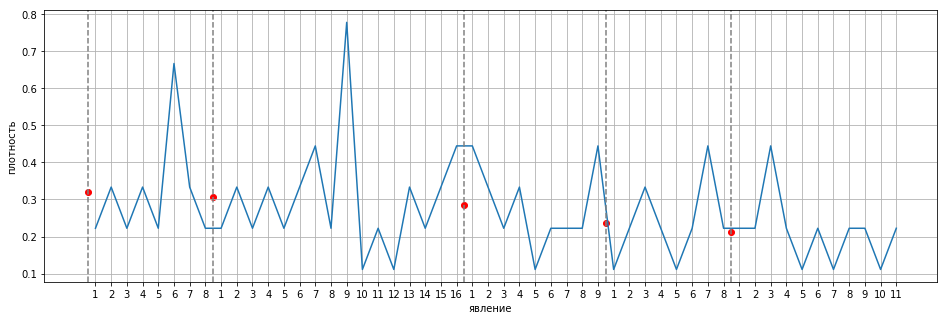

In [8]:
from itertools import accumulate

plt.subplots(figsize=(16, 5));

flat = [tup for act in scene_d for tup in enumerate(act, start=1)]
ticks, values = zip(*flat)
plt.plot(values);
plt.xticks(range(len(ticks)), ticks);

borders = np.array(list(accumulate(map(len, [[]] + scene_d))))
plt.scatter(borders[:-1]-0.5, act_d, c='red');
for x in borders[:-1]:
    plt.axvline(x-0.5, c='gray', ls='--');
    
plt.xlabel('явление');
plt.ylabel('плотность');
plt.grid();

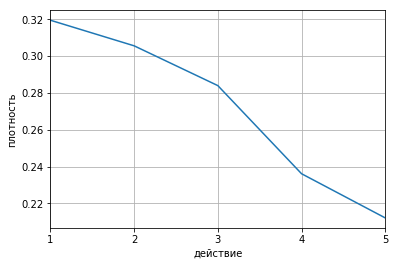

In [9]:
plt.plot(act_d)
plt.grid();
plt.xlabel('действие');
plt.ylabel('плотность');
plt.xticks(range(len(act_d)+1), range(1, len(act_d)+1));
plt.xlim([0, len(act_d)-1]);

## Расстояние

In [10]:
def dist(mat):
    n = len(drama_heroes)
    dist = np.zeros((n, n))*np.nan
    for i in range(n-1):
        for j in range(i+1, n):
            if np.sum(mat[i]) != 0 and np.sum(mat[j]) != 0:
                dist[i][j] = dist[j][i] = np.sum(np.abs(mat[i] - mat[j]))
    return dist/len(mat[0])

In [11]:
act_d = [dist(m) for m in matrices]
drama_d = dist(matrix)

In [12]:
distances = [pd.DataFrame(d, index=drama_heroes, columns=drama_heroes).stack() for d in act_d + [drama_d]]
distances = pd.concat(distances, axis=1)
distances.columns = list(range(1, len(act_d) + 1)) + ['пьеса']
distances.round(2).fillna('')

1     2     3     4     5  пьеса
Варвара        Вера Сергеевна        0.25        0.25         0.25
               Гости                 0.12                     0.08
               Губарев               0.19                     0.19
               Леонтьев              0.50  0.78  0.62         0.58
               Люба                  0.31  0.56  0.12         0.25
               Наташа                0.69  0.56   0.5         0.46
               Соницкий              0.31        0.25         0.31
               Софья Павловна        0.56  0.78   0.5         0.56
Вера Сергеевна Варвара               0.25        0.25         0.25
               Гости                 0.12                     0.17
               Губарев         0.75  0.19                     0.21
               Леонтьев         0.5  0.50        0.38  0.73   0.56
               Люба                  0.44        0.38  0.27   0.42
               Наташа          0.38  0.56        0.75  0.27   0.48
               Соницкий        0.25  0.19           0     0   0.10
               Софья Павловна  0.75  0.69        0.25  0.45   0.62
Гости          Варвара               0.12                     0.08
               Вера Сергеевна        0.12                     0.17
               Губарев               0.06                     0.12
               Леонтьев              0.38                     0.50
               Люба                  0.31                     0.25
               Наташа                0.69                     0.46
               Соницкий              0.19                     0.23
               Софья Павловна        0.56                     0.56
Губарев        Варвара               0.19                     0.19
               Вера Сергеевна  0.75  0.19                     0.21
               Гости                 0.06                     0.12
               Леонтьев         0.5  0.44                     0.58
               Люба                  0.38                     0.37
               Наташа          0.62  0.75                     0.54
               Соницкий         0.5  0.25                     0.19
               Софья Павловна  0.25  0.62                     0.56
Леонтьев       Варвара               0.50  0.78  0.62         0.58
               Вера Сергеевна   0.5  0.50        0.38  0.73   0.56
               Гости                 0.38                     0.50
               Губарев          0.5  0.44                     0.58
               Люба                  0.56  0.44  0.75  0.82   0.56
               Наташа          0.12  0.69  0.44  0.88  0.64   0.58
               Соницкий        0.75  0.31        0.38  0.73   0.54
               Софья Павловна  0.25  0.31  0.22  0.38  0.64   0.37
Люба           Варвара               0.31  0.56  0.12         0.25
               Вера Сергеевна        0.44        0.38  0.27   0.42
               Гости                 0.31                     0.25
               Губарев               0.38                     0.37
               Леонтьев              0.56  0.44  0.75  0.82   0.56
               Наташа                0.50  0.22  0.38  0.36   0.37
               Соницкий              0.50        0.38  0.27   0.48
               Софья Павловна        0.50  0.67  0.62  0.55   0.54
Наташа         Варвара               0.69  0.56   0.5         0.46
               Вера Сергеевна  0.38  0.56        0.75  0.27   0.48
               Гости                 0.69                     0.46
               Губарев         0.62  0.75                     0.54
               Леонтьев        0.12  0.69  0.44  0.88  0.64   0.58
               Люба                  0.50  0.22  0.38  0.36   0.37
               Соницкий        0.62  0.62        0.75  0.27   0.54
               Софья Павловна  0.38  0.50  0.67  0.75  0.73   0.60
Соницкий       Варвара               0.31        0.25         0.31
               Вера Сергеевна  0.25  0.19           0     0   0.10
               Гости                 0.19                     0.23
              

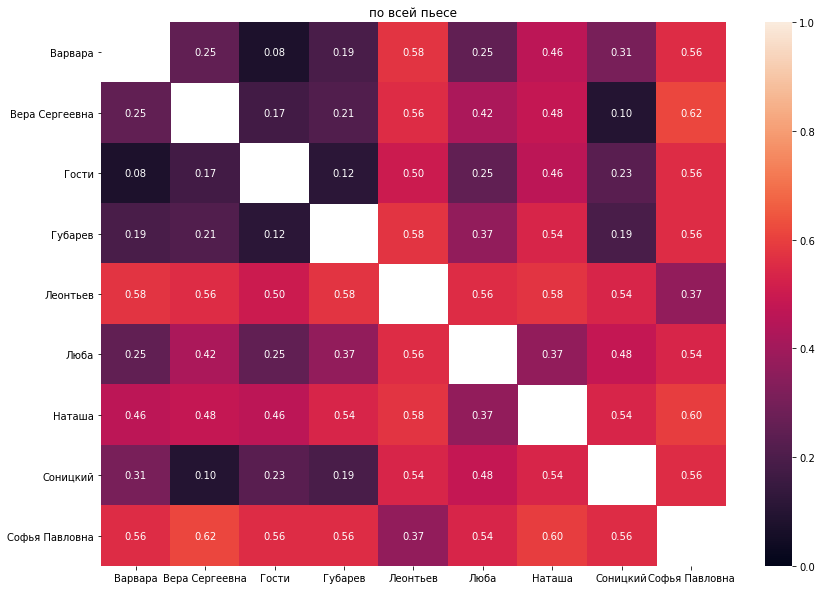

In [13]:
plt.subplots(figsize=(14, 10))
sns.heatmap(drama_d, vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
plt.title('по всей пьесе');

## Абстрактные типы отношений (= соп., <> альт., > или < дом.)

In [14]:
for i, j in zip(*np.where(drama_d == 0)):
    if i != j and i < j:
        p = np.sum(matrix[i])
        q = np.sum(matrix[j])
        s = '=' if p == q else ('>' if p > q else '<')
        print(drama_heroes[i], s, drama_heroes[j])

## Ранг

In [15]:
rank = [np.sum(np.sum(matrix, axis=0)[np.where(matrix[i] != 0)[0]] - 1) for i in range(len(drama_heroes))]
df = pd.DataFrame(dict(zip(drama_heroes, rank)), index=['ранг']).sort_values(by='ранг', axis=1, ascending=False)

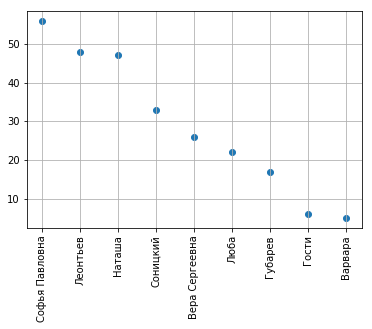

In [16]:
plt.scatter(range(len(drama_heroes)), df.values);
plt.xticks(range(len(drama_heroes)), df.columns, rotation=90);
plt.grid();

In [17]:
df

,Софья Павловна,Леонтьев,Наташа,Соницкий,Вера Сергеевна,Люба,Губарев,Гости,Варвара
ранг,56,48,47,33,26,22,17,6,5


## Абсолютные относительные частоты

In [18]:
def freq(mat):
    return np.sum(mat, axis=1)/len(mat[0])

index = list(range(1, len(matrices) + 1)) + ['пьеса']
freq_abs = list(map(freq, matrices + [matrix]))
freq_abs = pd.DataFrame(freq_abs, index=index, columns=drama_heroes).round(2).transpose()
freq_abs[freq_abs == 0] = ''
freq_abs.sort_values(by='пьеса', ascending=False)

,1,2,3,4,5,пьеса
Софья Павловна,0.38,0.62,0.89,0.38,0.55,0.58
Леонтьев,0.12,0.44,0.67,0.5,0.82,0.52
Наташа,0.25,0.75,0.44,0.62,0.18,0.48
Соницкий,0.88,0.25,,0.12,0.09,0.25
Люба,,0.25,0.44,0.25,0.18,0.23
Вера Сергеевна,0.62,0.19,,0.12,0.09,0.19
Губарев,0.62,0.12,,,,0.13
Варвара,,0.06,0.11,0.12,,0.06
Гости,,0.06,,,,0.02


## Условные относительные частоты

In [19]:
def rel_freq(mat):
    busyness = np.sum(mat, axis=1)
    freq_rel = np.zeros((len(drama_heroes), len(drama_heroes)))
    for i in range(len(mat)):
        for j in range(len(mat)):
            if busyness[j] == 0 or i == j:
                freq_rel[i, j] = np.nan
            else:
                freq_rel[i, j] = np.count_nonzero(mat[i] + mat[j] - 2 == 0)/busyness[j]
    return freq_rel

for i, m in enumerate(matrices):
    print('Действие', i+1)
    pd.DataFrame(rel_freq(m), index=drama_heroes, columns=drama_heroes).round(2).fillna('')
    
print('По всей пьесе')
pd.DataFrame(rel_freq(matrix), index=drama_heroes, columns=drama_heroes).round(2).fillna('')

Действие 1


,Варвара,Вера Сергеевна,Гости,Губарев,Леонтьев,Люба,Наташа,Соницкий,Софья Павловна
Варвара,,0,,0,0,,0,0,0
Вера Сергеевна,,,,0.4,1,,1,0.71,0.33
Гости,,0,,0,0,,0,0,0
Губарев,,0.4,,,1,,0.5,0.57,1
Леонтьев,,0.2,,0.2,,,0.5,0.14,0.33
Люба,,0,,0,0,,0,0,0
Наташа,,0.4,,0.2,1,,,0.29,0.33
Соницкий,,1,,0.8,1,,1,,0.67
Софья Павловна,,0.2,,0.6,1,,0.5,0.29,


Действие 2


,Варвара,Вера Сергеевна,Гости,Губарев,Леонтьев,Люба,Наташа,Соницкий,Софья Павловна
Варвара,,0,0,0,0,0,0.08,0,0.1
Вера Сергеевна,0,,1,0.5,0.14,0,0.25,0.5,0.1
Гости,0,0.33,,0.5,0.14,0,0.08,0.25,0.1
Губарев,0,0.33,1,,0.14,0,0.08,0.25,0.1
Леонтьев,0,0.33,1,0.5,,0.25,0.33,0.75,0.6
Люба,0,0,0,0,0.14,,0.33,0,0.3
Наташа,1,1,1,0.5,0.57,1,,0.75,0.7
Соницкий,0,0.67,1,0.5,0.43,0,0.25,,0.3
Софья Павловна,1,0.33,1,0.5,0.86,0.75,0.58,0.75,


Действие 3


,Варвара,Вера Сергеевна,Гости,Губарев,Леонтьев,Люба,Наташа,Соницкий,Софья Павловна
Варвара,,,,,0,0,0,,0.12
Вера Сергеевна,0,,,,0,0,0,,0
Гости,0,,,,0,0,0,,0
Губарев,0,,,,0,0,0,,0
Леонтьев,0,,,,,0.75,0.75,,0.75
Люба,0,,,,0.5,,0.75,,0.38
Наташа,0,,,,0.5,0.75,,,0.38
Соницкий,0,,,,0,0,0,,0
Софья Павловна,1,,,,1,0.75,0.75,,


Действие 4


,Варвара,Вера Сергеевна,Гости,Губарев,Леонтьев,Люба,Наташа,Соницкий,Софья Павловна
Варвара,,0,,,0,0.5,0.2,0,0
Вера Сергеевна,0,,,,0.25,0,0,1,0.33
Гости,0,0,,,0,0,0,0,0
Губарев,0,0,,,0,0,0,0,0
Леонтьев,0,1,,,,0,0.2,1,0.67
Люба,1,0,,,0,,0.4,0,0
Наташа,1,0,,,0.25,1,,0,0.33
Соницкий,0,1,,,0.25,0,0,,0.33
Софья Павловна,0,1,,,0.5,0,0.2,1,


Действие 5


,Варвара,Вера Сергеевна,Гости,Губарев,Леонтьев,Люба,Наташа,Соницкий,Софья Павловна
Варвара,,0,,,0,0,0,0,0
Вера Сергеевна,,,,,0.11,0,0,1,0.17
Гости,,0,,,0,0,0,0,0
Губарев,,0,,,0,0,0,0,0
Леонтьев,,1,,,,0.5,1,1,0.67
Люба,,0,,,0.11,,0,0,0.17
Наташа,,0,,,0.22,0,,0,0
Соницкий,,1,,,0.11,0,0,,0.17
Софья Павловна,,1,,,0.44,0.5,0,1,


По всей пьесе


,Варвара,Вера Сергеевна,Гости,Губарев,Леонтьев,Люба,Наташа,Соницкий,Софья Павловна
Варвара,,0,0,0,0,0.08,0.08,0,0.07
Вера Сергеевна,0,,1,0.43,0.15,0,0.2,0.69,0.13
Гости,0,0.1,,0.14,0.04,0,0.04,0.08,0.03
Губарев,0,0.3,1,,0.07,0,0.08,0.38,0.13
Леонтьев,0,0.4,1,0.29,,0.42,0.44,0.46,0.63
Люба,0.33,0,0,0,0.19,,0.36,0,0.23
Наташа,0.67,0.5,1,0.29,0.41,0.75,,0.38,0.4
Соницкий,0,0.9,1,0.71,0.22,0,0.2,,0.23
Софья Павловна,0.67,0.4,1,0.57,0.7,0.58,0.48,0.54,


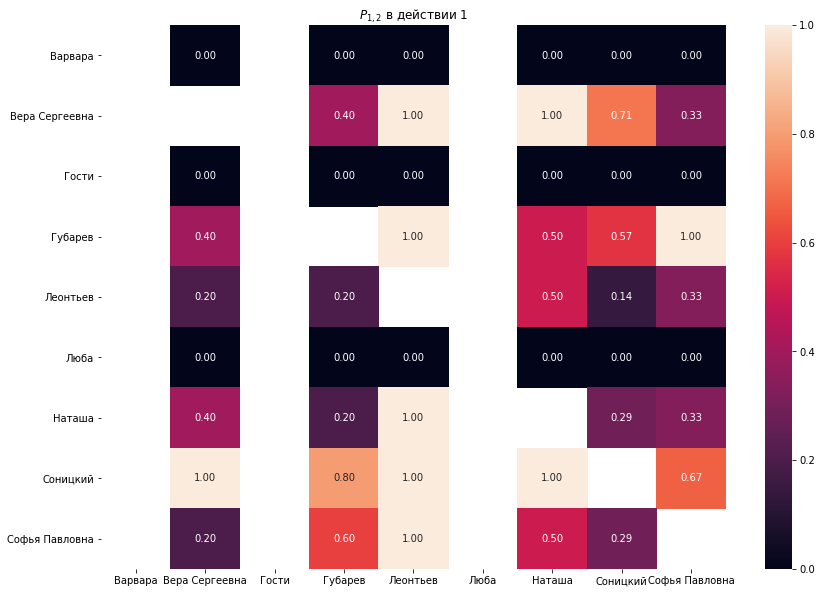

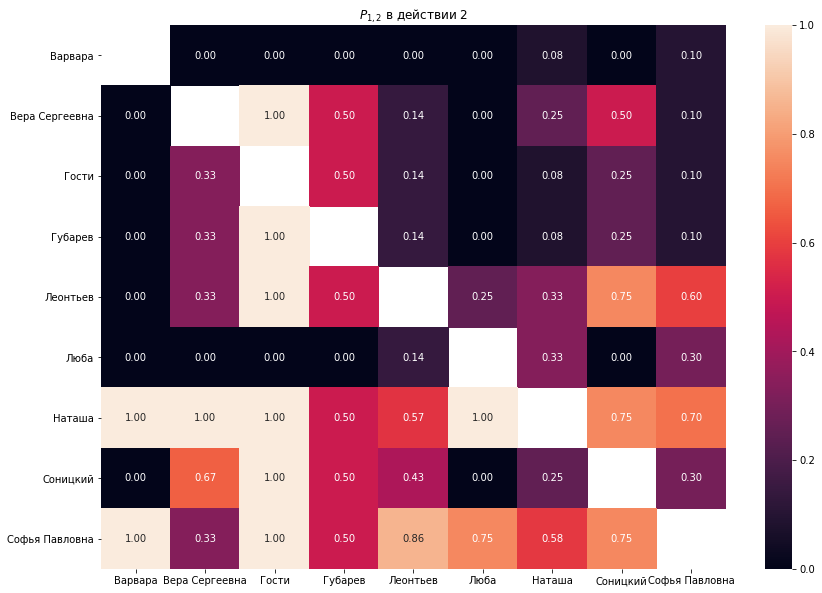

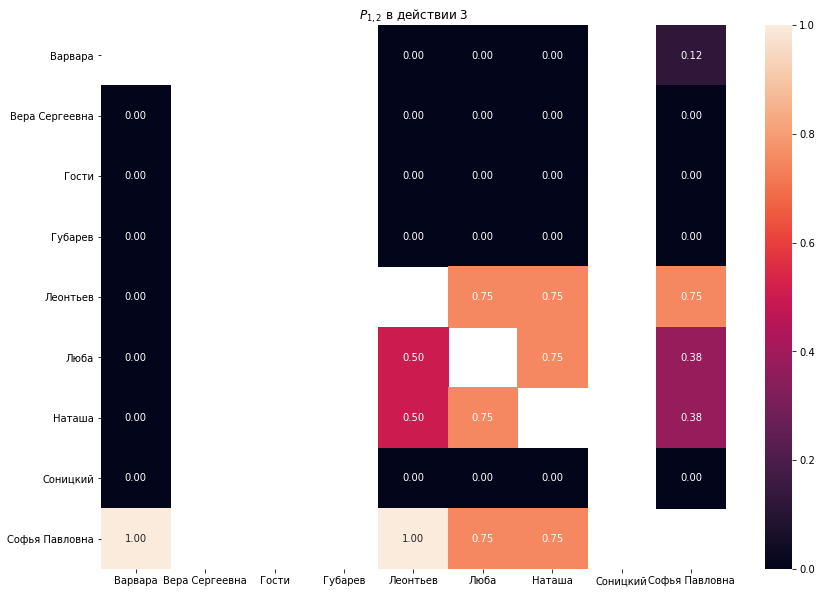

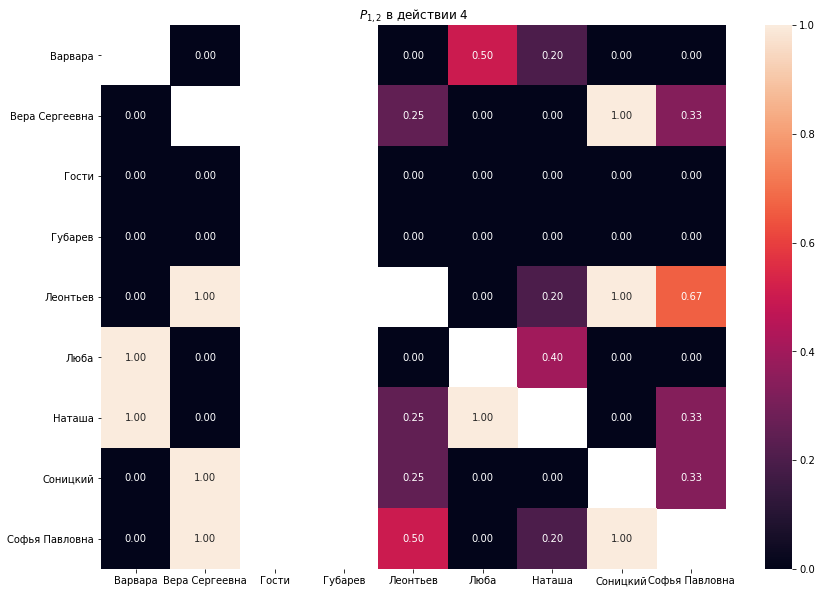

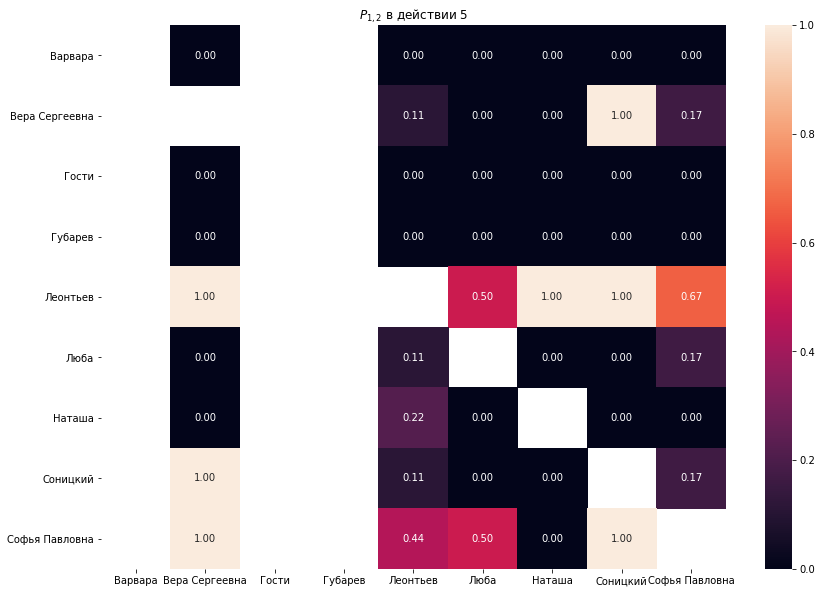

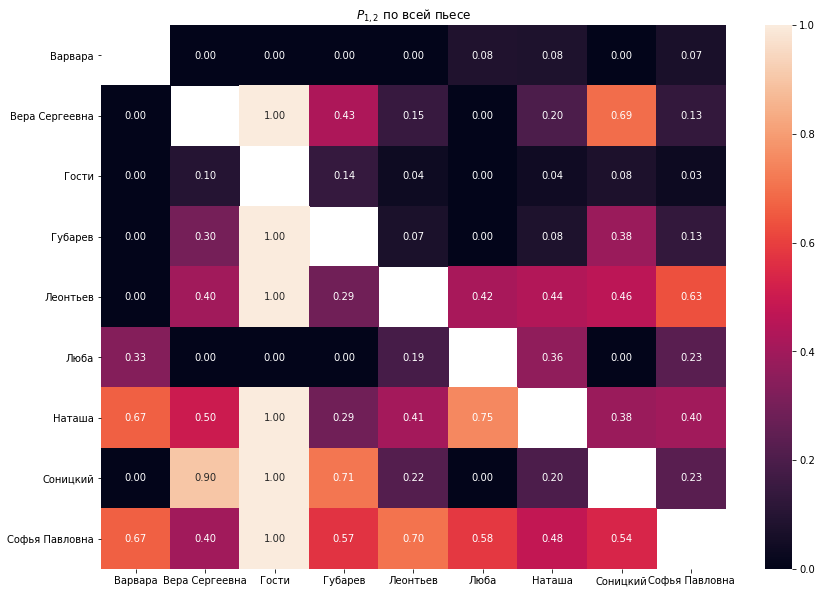

In [20]:
for i, m in enumerate(matrices):
    plt.subplots(figsize=(14, 10))
    sns.heatmap(rel_freq(m), vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
    plt.title(r"$P_{1,2}$ в действии " + str(i+1));

plt.subplots(figsize=(14, 10))
sns.heatmap(rel_freq(matrix), vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
plt.title(r"$P_{1,2}$ по всей пьесе");

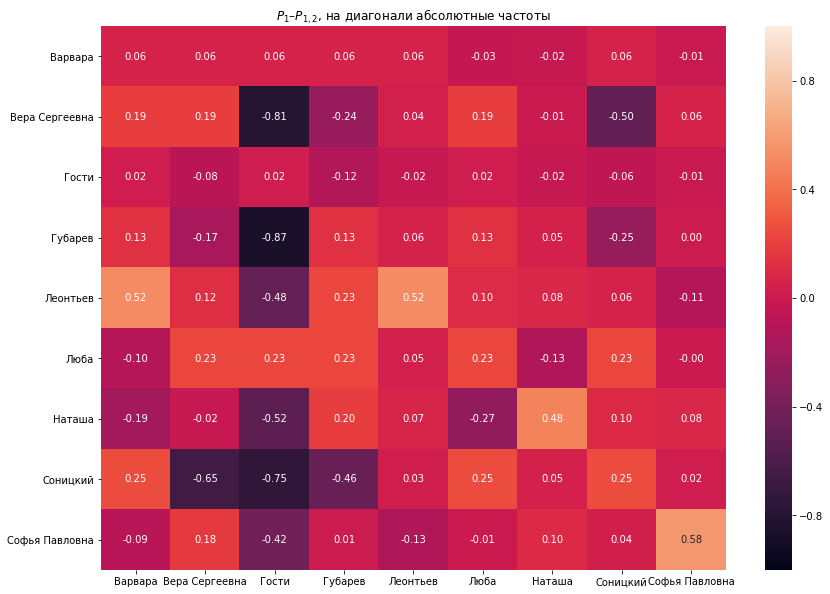

In [21]:
freq_abs = freq(matrix).reshape((-1, 1))
freq_rel = rel_freq(matrix)
freq_ = freq_abs - freq_rel
freq_[np.diag_indices(len(freq_[0]))] = freq_abs.ravel()
plt.subplots(figsize=(14, 10))
sns.heatmap(freq_, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f', vmin=-1, vmax=1)
plt.title(r"$P_1 – P_{1,2}$, на диагонали абсолютные частоты");